# Linear Regression on Tabular Data

### Re-implementation from [Daniel Bourke](https://www.learnpytorch.io/01_pytorch_workflow/?ref=daniel-bourke#1-data-preparing-and-loading)

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

SEED_VAL = 100 # for reproduceability in torch.randn()

### Assemble data

In [2]:
# create *known* parameters
weight = 0.7
bias = 0.3

# generate data
X = torch.arange(start=0, end=1, step=0.02).unsqueeze(dim=1)
y = weight * X + bias

print(X[:10]) 
print(X.shape)
print(y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
torch.Size([50, 1])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


Text(0.5, 1.0, 'ground truth')

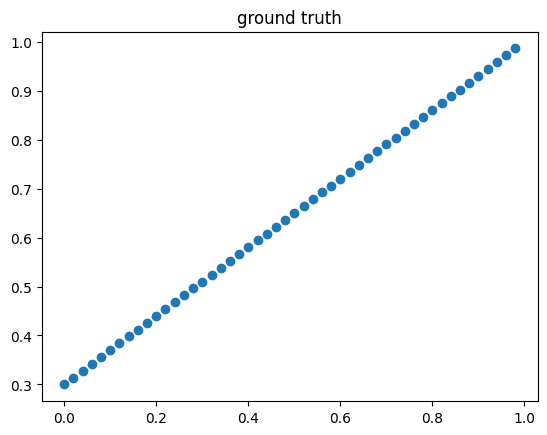

In [3]:
plt.scatter(X, y)
plt.title('ground truth')
# plt.legend(['ground truth', 'fit']);

In [4]:
# split dataset
train_split = int(0.8 * len(X)) # 80% of data used for training set, 10% for validation, 10% for testing
dev_split = int(0.9 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_dev, y_dev = X[train_split:dev_split], y[train_split:dev_split]
X_test, y_test = X[dev_split:], y[dev_split:]

len(X_train), len(X_dev), len(X_test)

(40, 5, 5)

### Build model

In [5]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # only 1 weight and bias
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, x: torch.Tensor):
        return (self.weights * x) + self.bias

In [6]:
# seed for reproduceability
torch.manual_seed(SEED_VAL)

# initialize model with random parameters
model = LinearRegressionModel()

print(list(model.parameters()))

[Parameter containing:
tensor([0.3607], requires_grad=True), Parameter containing:
tensor([-0.2859], requires_grad=True)]


In [7]:
print(model.state_dict())

OrderedDict([('weights', tensor([0.3607])), ('bias', tensor([-0.2859]))])


### Train model

In [8]:
# create a loss function
loss_fn = nn.MSELoss() 

# optimizer will update parameters with gradients calculated from backpropagation
optim = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [9]:
torch.manual_seed(SEED_VAL)

epochs = 300

# for tracking learning
train_loss_values = []
dev_loss_values = []
epoch_count = []


# ----------- train loop -----------
for epoch in range(epochs):
    # "training" mode
    model.train()
    
    # forward pass
    y_pred = model(X_train)
    
    # calculate loss
    loss = loss_fn(y_pred, y_train)
    
    # clear optimizer accumulation
    optim.zero_grad()
    
    # calcualte gradients via backpropagation
    loss.backward()
    
    # update parameters
    optim.step()
    
    # ----------- validation -----------
    if epoch % 10 == 0:
        with torch.inference_mode():
            # forward pass
            y_pred_dev = model(X_dev)

            loss_dev = loss_fn(y_pred_dev, y_dev)
        
        train_loss_values += [loss.detach().numpy()]
        dev_loss_values += [loss_dev.detach().numpy()]
        epoch_count += [epoch]
        
        print(f"Epoch: {epoch} | Train Loss: {loss} | Dev Loss: {loss_dev} ")

Epoch: 0 | Train Loss: 0.5220428705215454 | Dev Loss: 0.7253028750419617 
Epoch: 10 | Train Loss: 0.32666802406311035 | Dev Loss: 0.463650643825531 
Epoch: 20 | Train Loss: 0.20446214079856873 | Dev Loss: 0.2979274094104767 
Epoch: 30 | Train Loss: 0.12802210450172424 | Dev Loss: 0.19265088438987732 
Epoch: 40 | Train Loss: 0.08020783960819244 | Dev Loss: 0.12553152441978455 
Epoch: 50 | Train Loss: 0.05029844120144844 | Dev Loss: 0.08255185186862946 
Epoch: 60 | Train Loss: 0.031588297337293625 | Dev Loss: 0.05488539859652519 
Epoch: 70 | Train Loss: 0.019883129745721817 | Dev Loss: 0.0369650274515152 
Epoch: 80 | Train Loss: 0.012559471651911736 | Dev Loss: 0.02527216076850891 
Epoch: 90 | Train Loss: 0.00797642208635807 | Dev Loss: 0.01757768727838993 
Epoch: 100 | Train Loss: 0.00510761421173811 | Dev Loss: 0.012464962899684906 
Epoch: 110 | Train Loss: 0.0033110666554421186 | Dev Loss: 0.009030468761920929 
Epoch: 120 | Train Loss: 0.0021852320060133934 | Dev Loss: 0.0066953687928

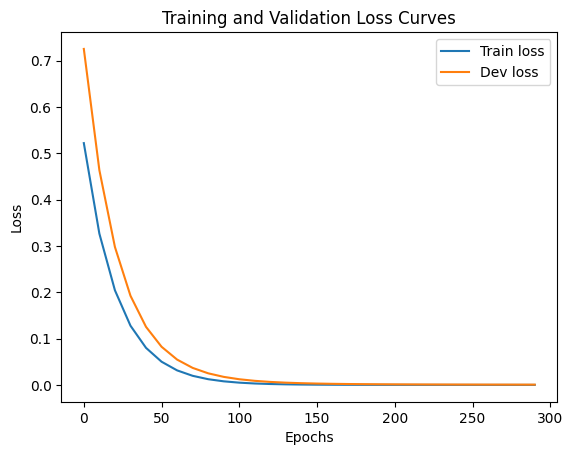

In [10]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, dev_loss_values, label="Dev loss")
plt.title("Training and Validation Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [11]:
# ----------- test loop -----------
test_loss_values = []

for i in range(len(X_test)):
    with torch.inference_mode():
        # forward pass
        y_pred_test = model(X_test)

        loss_test = loss_fn(y_pred_test, y_test)

In [12]:
# compare validation loss to test loss
print(loss_dev)
print(loss_test)

tensor(0.0009)
tensor(0.0012)


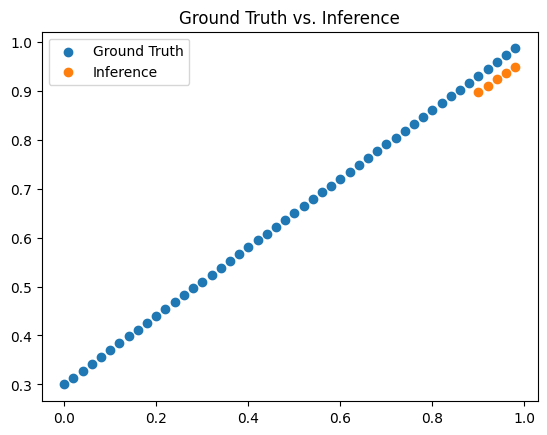

In [13]:
plt.scatter(X, y)
plt.title('Ground Truth vs. Inference')
plt.scatter(X_test, y_pred_test)
plt.legend(['Ground Truth', 'Inference']);

In [14]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6349])), ('bias', tensor([0.3260]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3
